In [2]:
from scipy.signal import find_peaks
import numpy as np
import os
import matplotlib.pyplot as plt 
import glob
import pandas as pd
import sys

# Add the 'src' directory to sys.path
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import custom modules
from LAB_UW_forward_modeling import *
from file_io import *
from signal_processing import *
from synthetic_data import *


In [3]:

def find_mechanical_data(file_path_list, pattern):
    """
    Trova un file specifico all'interno di una lista di percorsi dei file utilizzando un pattern.
    
    Args:
        file_path_list (list): Lista di percorsi dei file in cui cercare il file.
        pattern (str): Pattern per il nome del file da cercare.
    
    Returns:
        str: Percorso completo del file trovato, o None se non viene trovato nessun file corrispondente.
    """
    for file_path in file_path_list:
        if glob.fnmatch.fnmatch(file_path, pattern):
            print("MECHANICAL DATA CHOOSE:", file_path)
            return file_path
    return None  # Nessun file trovato nella lista
    

def find_sync_values(mech_data_path):
    """
    Trova i valori di picco sincronizzazione all'interno di un file di dati meccanici.

    Questa funzione legge un file CSV contenente dati meccanici, estrae la colonna
    relativa alla sincronizzazione e individua i picchi di sincronizzazione in base
    ai parametri specificati.

    Args:
        mech_data_path (str): Percorso del file CSV contenente i dati meccanici.

    Returns:
        numpy.ndarray: Un array NumPy contenente gli indici dei picchi di sincronizzazione
                       trovati nei dati meccanici.
    """
    mech_data = pd.read_csv(mech_data_path, sep=',', skiprows=[1])
    sync_data = mech_data.sync
    
    # Trova i picchi di sincronizzazione nei dati sincronizzazione
    sync_peaks, _ = find_peaks(sync_data, prominence=4.2, height=4)
    print(sync_peaks)
    return mech_data, sync_data, sync_peaks

def plot_sync_peaks(sync_data, sync_peaks, experiment_name):
    """
    Visualizza i picchi di sincronizzazione su un grafico dei dati di sincronizzazione.

    Questa funzione prende i dati di sincronizzazione e gli indici dei picchi di sincronizzazione,
    quindi crea un grafico per visualizzare sia i dati di sincronizzazione che i picchi di sincronizzazione
    evidenziati in rosso.

    Args:
        sync_data (numpy.ndarray): Array NumPy contenente i dati di sincronizzazione.
        sync_peaks (numpy.ndarray): Array NumPy contenente gli indici dei picchi di sincronizzazione.
        experiment_name (str): Nome dell'esperimento o della prova da visualizzare nel titolo del grafico.
    """
    
    plt.figure(figsize=(10, 4))
    plt.title(f'Sync Peaks {experiment_name}')
    

    # Plot dei picchi di sincronizzazione evidenziati in rosso
    plt.scatter(np.arange(0, len(sync_data))[sync_peaks], sync_data[sync_peaks], c='r', s = 10, zorder = 2, alpha = 0.8)
    
    # Plot dei dati di sincronizzazione
    plt.plot(sync_data, zorder = 1, c = 'k', linewidth = 0.8)
    
    plt.ylabel('Arduino voltage [V]', fontsize=12)
    plt.xlabel('records #', fontsize=12)
    
    plt.show()
    



In [4]:
# Define the color data in Extended Array format
colors = {
    'reseda_green': '#788054',
    'dutch_white': '#E0D6B4',
    'khaki': '#CABB9E',
    'platinum': '#E7E5E2',
    'black_olive': '#322D1E'
}

In [5]:
# Load Waveform data
machine_name = "Brava_2"
experiment_name = "s0108"
data_type_uw = 'data_tsv_files'
data_type_mech = 'mechanical_data'
sync_file_pattern = '*s*_data_rp' #pattern to find specific experiment in mechanical data

# #MAKE MECHANICAL PATH LIST
# infile_path_list_mech = make_infile_path_list(machine_name, experiment_name, data_type=data_type_mech)
# #LOAD MECHANICAL DATA
# mech_data_path= find_mechanical_data(infile_path_list_mech, sync_file_pattern)
# mech_data, _ , sync_peaks = find_sync_values(mech_data_path)

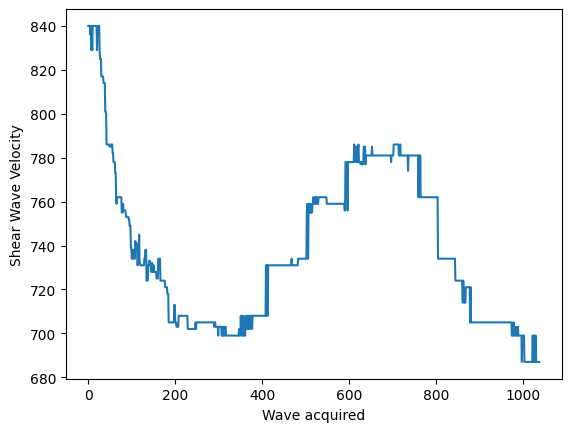

In [7]:
dir_path = "/home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0108/data_analysis/global_optimization_velocity/workstation_ones/global_optimization_velocity_cargese"
cmin = 600       
cmax = 1000
c_step = 1
c_gouge_list = np.arange(cmin, cmax,c_step) 

for idx, file_name in enumerate(sorted(os.listdir(dir_path))):
    if idx == 0:
        file_path = os.path.join(dir_path,file_name)
        l2_norm = np.load(file_path) 

        right_v = c_gouge_list[np.argmin(l2_norm, axis=1)]
        plt.xlabel("Wave acquired")
        plt.ylabel("Shear Wave Velocity")

plt.plot(right_v)

Text(0, 0.5, 'Misfit')

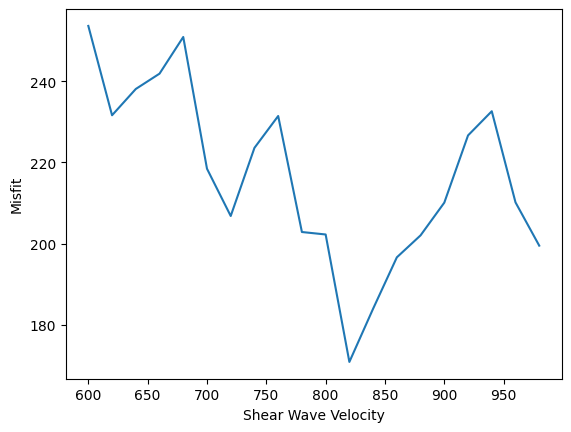

In [17]:

plt.plot(c_gouge_list,l2_norm[0,:])
plt.xlabel("Shear Wave Velocity")
plt.ylabel("Misfit")


In [7]:
import pickle
dir_path = "/home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0108/data_analysis/global_optimization_velocity"
file_name = "001_run_in_10MPa"
file_path = os.path.join(dir_path,file_name)

# Load the data
with open(file_path + '_results.pkl', 'rb') as f:
    data = pickle.load(f)

L2norm_all_waveforms = data['L2norm_all_waveforms']
velocity_ranges = data['velocity_ranges']
estimated_velocities = data['estimated_velocities']

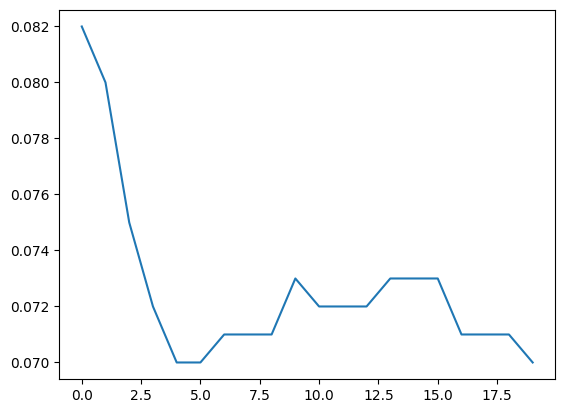

In [8]:
plt.plot(estimated_velocities)